In [107]:
# BinaryErodeImageFilter

import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [108]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [109]:
path = 'data/interrsect_005.nii.gz'

reader = sitk.ImageFileReader()
reader.SetImageIO("NiftiImageIO")
reader.SetFileName(path)
image = reader.Execute()

idxSlice = 24

# int labels to assign to the segmented white and gray matter.
labelWhiteMatter = 4
labelGrayMatter = 1

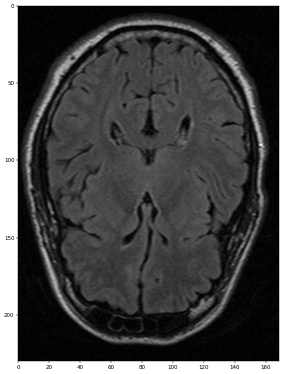

In [110]:
image_1 = image[:,:,idxSlice]

sitk_show(image_1)

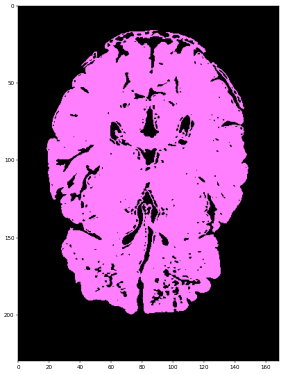

In [111]:
# skull only
# lstSeeds = [(120,44)]

lstSeeds = [(256, 188)]


img_skull_hightlighted = SimpleITK.ConnectedThreshold(image1=image_1, 
                                              seedList=lstSeeds, 
                                              lower=230, 
                                              upper=380,
                                              replaceValue=labelWhiteMatter)

# Rescale 'imgSmooth' and cast it to an integer type to match that of 'imgWhiteMatter'
imgSkullSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(img_skull_hightlighted), img_skull_hightlighted.GetPixelID())

# Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
sitk_show(SimpleITK.LabelOverlay(imgSkullSmoothInt, img_skull_hightlighted))


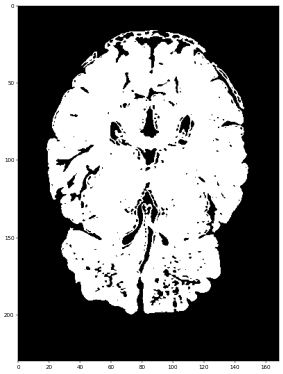

In [112]:
# lstSeeds = [(256, 188)]

def erode(image):
    radius=(1,1,1)
    eroded = SimpleITK.BinaryErode(image, radius)
    return eroded

eroded_1 = erode(img_skull_hightlighted)
sitk_show(eroded_1)

# eroded_image = SimpleITK.BinaryErode(imgSkullSmoothInt, [3,3])

#eroded_smoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(eroded_image), eroded_image.GetPixelID())

# Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
#sitk_show(SimpleITK.LabelOverlay(eroded_smoothInt, eroded_image))
# sitk_show(eroded_image)

In [113]:
def dilate(image):
    radius = (1,1,1)
    dilated = SimpleITK.BinaryDilate(image, radius)
    return dilated

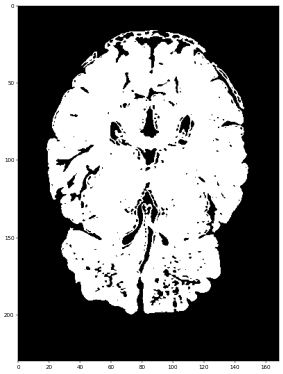

In [114]:
dilated_1 = dilate(eroded_1)

sitk_show(dilated_1)

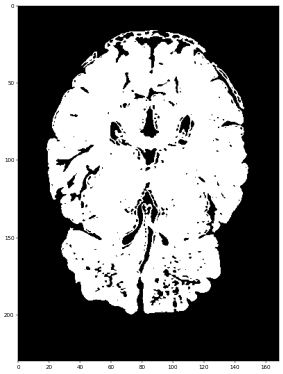

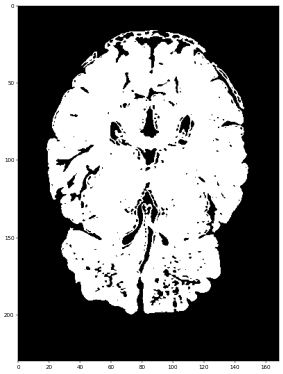

In [115]:
eroded_2 = erode(dilated_1)
sitk_show(eroded_2)
eroded_3 = erode(eroded_2)

dilated_2 = dilate(eroded_3)

dilated_3 = dilate(dilated_2)
#sitk_show(dilated_3)

eroded_4 = erode(dilated_2)
dilated_4 = dilate(eroded_4)

sitk_show(dilated_4)

In [116]:
def overlay(image1, image2):
    sitk_show(sitk.LabelOverlay(image1, image2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


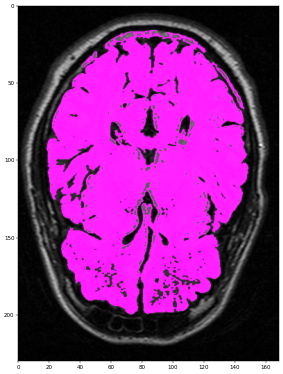

In [117]:
imgSmoothInt = sitk.Cast(sitk.RescaleIntensity(image_1), image_1.GetPixelID())

overlay(imgSmoothInt, dilated_4)